In [66]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

In [67]:
df = pd.read_csv('/Users/pernebayarailym/Documents/Portfolio Projects AP/Python Projects/Project_18_HOMICIDE_Analysis/homicide_by_countries.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [68]:
df.shape

(195, 6)

In [69]:
df.isnull().sum()
#df.dropna(subset = ['Subregion'], inplace = True) #If I have any null column and I wanna drop it, this function uses

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [70]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [71]:
df['Rate'] = df['Rate'].astype(int)

In [72]:
#If I have many columns to convert the dtype, in professional way 
my_list = ['Rate', 'Count', 'Year']
for i in my_list:
    print(i)
    df[i] = df[i].astype(int)

Rate
Count
Year


In [73]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [74]:
df1 = df.sort_values('Count', ascending=False)
df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


In [75]:
df1 = df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).head(5)
df1['Perc'] = (df1['Count']*100/df1['Count'].sum()).round(2)
df1

,Location,Count,Perc
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


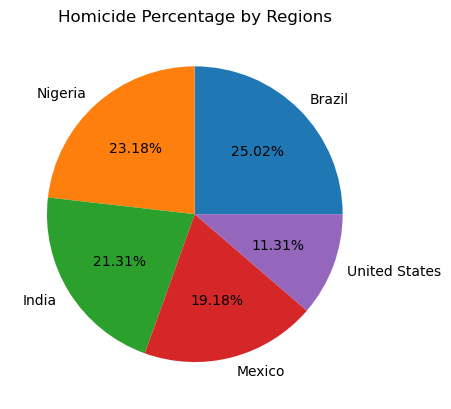

In [76]:
ax = df1.plot(kind = 'pie', y='Count', labels=df1['Location'], autopct='%1.2f%%', title = 'Homicide Percentage by Regions', legend=False)
ax.set_ylabel('') #to hide labels 
plt.show()

In [77]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [78]:
df['Region'].replace('Americas', 'N/S America', inplace = True)

In [79]:
df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

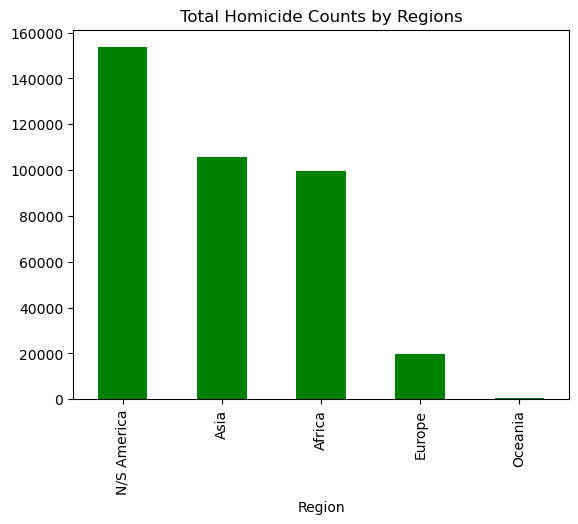

In [80]:
df2.plot(kind='bar', color = 'green', title = 'Total Homicide Counts by Regions')
plt.show()

In [81]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [82]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [83]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [84]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

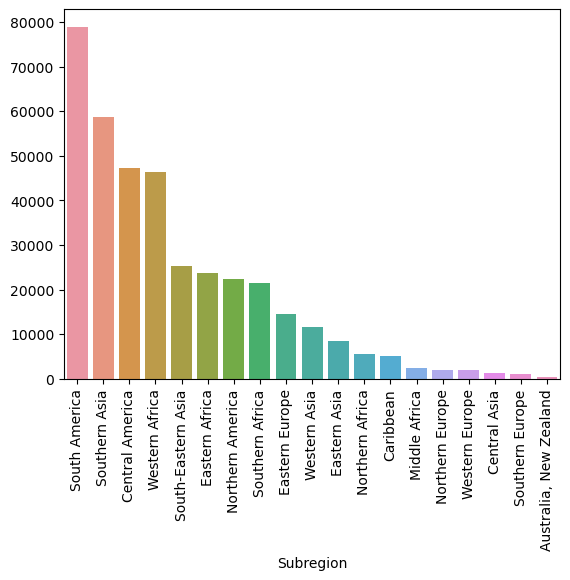

In [85]:
#seaborn lb = sns
sns.barplot(x=df3.index, y=df3.values)
plt.xticks(rotation = 'vertical')
xlabel= None

In [86]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [87]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [88]:
df[df['Region'].isin(['Asia','Europe'])]

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
3,Andorra,Europe,Southern Europe,2,2,2020
8,Armenia,Asia,Western Asia,1,52,2020
11,Austria,Europe,Western Europe,0,65,2020
...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0,64,2019
184,United Kingdom,Europe,Northern Europe,1,755,2018
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [89]:
df4 = df[(df['Region'] == 'Asia') | (df['Region'] == 'Europe')]

In [90]:
df4 = df4[df4['Year']>2016][['Region', 'Year', 'Count']]

In [91]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [92]:
df4 = df4.groupby(['Region', 'Year']).sum()['Count']
df4

Region  Year
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [93]:
#need unstack it = convert to rows and columns
df_unstacked = df4.unstack(level=0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [97]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)
#changed the df index type otherwise the years are gonna be shown as 2017.0...

Text(0, 0.5, 'Count')

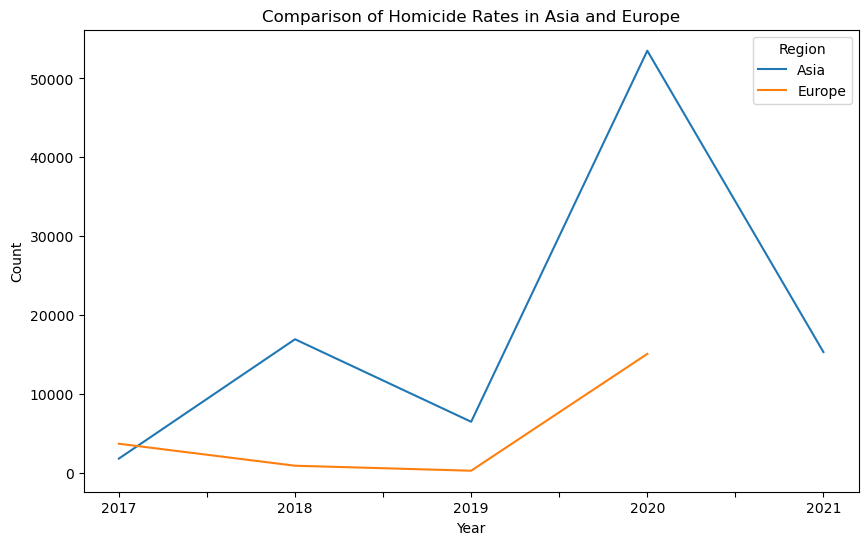

In [96]:
df_unstacked.plot(kind='line', figsize=(10,6), title = 'Comparison of Homicide Rates in Asia and Europe')
plt.xlabel('Year')
plt.ylabel('Count')